<a href="https://colab.research.google.com/github/Yousuf-Ejaz/WildFire_Detection/blob/main/Wildfire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data and Libraries


In [ ]:
#Pip installs
!pip install kaggle
!pip install Augmentor

#Import
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

import glob
import imageio
import numpy as np
import PIL
import time
import pathlib
from IPython import display

from zipfile import ZipFile
from google.colab import files

In [ ]:
#Kaggle Data Import
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"yousufejaz","key":"df45c6bc7cfc0ee6bb5c0efb7bdcfeec"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download --force -d phylake1337/fire-dataset

file_name = "/content/fire-dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

 99% 384M/387M [00:01<00:00, 219MB/s]
100% 387M/387M [00:01<00:00, 207MB/s]
done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Getting Data and Visualising


In [ ]:
#figure out how to add test

import os
fire_dir = os.path.join('/content/fire_dataset/fire_images')
no_fire_dir = os.path.join('/content/fire_dataset/non_fire_images')

print('total training fire images:', len(os.listdir(fire_dir)))
print('total training no fire images:', len(os.listdir(no_fire_dir)))

fire_files = os.listdir(fire_dir)
print(fire_files[:10])





total training fire images: 755
total training no fire images: 244
['fire.660.png', 'fire.206.png', 'fire.755.png', 'fire.137.png', 'fire.333.png', 'fire.48.png', 'fire.239.png', 'fire.633.png', 'fire.273.png', 'fire.370.png']


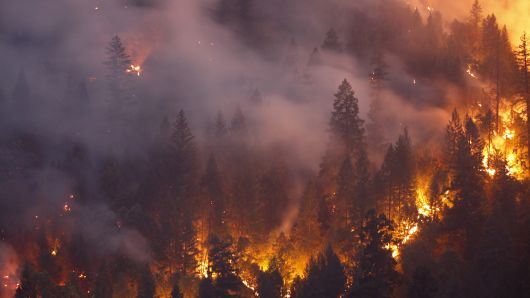

In [ ]:
from IPython.display import Image, display
display(Image('/content/fire_dataset/fire_images/fire.102.png'))

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        '/content/fire_dataset/',  
        target_size=(300, 300), 
        batch_size=128,
        class_mode='binary')

Found 999 images belonging to 2 classes.


# The Actual Model


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import EarlyStopping

EPOCHS = 10
es = EarlyStopping(
    monitor='loss', 
    mode='min',
    patience=3
)

history = model.fit(
  train_generator,
  steps_per_epoch=int(999/128),  
  epochs=EPOCHS,
  # validation_data = validation_generator,
  # validation_steps=int(2000/128),
  callbacks=[es]
)

Epoch 1/10
7/7 [==============================] - 214s 29s/step - loss: 0.5708 - accuracy: 0.7400
Epoch 2/10
7/7 [==============================] - 200s 27s/step - loss: 0.4168 - accuracy: 0.8163
Epoch 3/10
7/7 [==============================] - 200s 28s/step - loss: 0.2735 - accuracy: 0.8898
Epoch 4/10
7/7 [==============================] - 206s 29s/step - loss: 0.2062 - accuracy: 0.9254
Epoch 5/10
7/7 [==============================] - 204s 28s/step - loss: 0.1703 - accuracy: 0.9254
Epoch 6/10
7/7 [==============================] - 200s 28s/step - loss: 0.1480 - accuracy: 0.9403
Epoch 7/10
7/7 [==============================] - 208s 29s/step - loss: 0.1455 - accuracy: 0.9380
Epoch 8/10
7/7 [==============================] - 201s 28s/step - loss: 0.1402 - accuracy: 0.9369
Epoch 9/10
7/7 [==============================] - 200s 28s/step - loss: 0.1291 - accuracy: 0.9495
Epoch 10/10
7/7 [==============================] - 207s 29s/step - loss: 0.1359 - accuracy: 0.9392


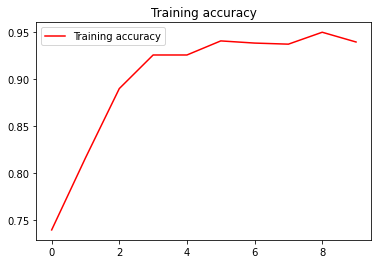

<Figure size 432x288 with 0 Axes>

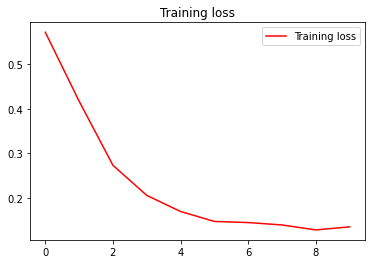

<Figure size 432x288 with 0 Axes>

In [ ]:
model.save("wildfire-weights.h5")

#Plotting
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
loss, acc = model.evaluate(train_generator, verbose=2)
print("Loss of model: " + str(loss)) 
print("Accuracy of model: "+ str(acc*100))

8/8 - 95s - loss: 0.1149 - accuracy: 0.9570 - 95s/epoch - 12s/step
Loss of model: 0.11494966596364975
Accuracy of model: 95.69569826126099


# Dumping the model

In [ ]:
from joblib import dump, load
dump(model, 'wildfireDetection_model.joblib') 

INFO:tensorflow:Assets written to: ram://d725876a-87d7-4e55-bd78-19d62fd73f3e/assets


['wildfireDetection_model.joblib']